In [1]:
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def list_files_matching_criteria(directory, criteria):
    files = sorted(os.listdir(directory))
    paths = {file.split(sep=".")[0]: os.path.join(directory, file) for file in files}
    filtered_paths = {file: path for file, path in paths.items() if criteria in file}
    return filtered_paths

In [3]:
result_dir = "/public/home/jijh/st_project/cellbin_analysis/annotated_cell_bins/moranI_result"

In [4]:
months = ["2M", "3M", "4M", "5M", "6M", "8M", "12M"]

In [5]:
df_paths = {}
for month in months:
    if month == "2M":
        df_paths[month] = list_files_matching_criteria(result_dir, "Z2M")
    else:
        df_paths[month] = list_files_matching_criteria(result_dir, month)


In [6]:
for key, value in df_paths.items():
    print(f"{key}: {len(value)}")

2M: 32
3M: 31
4M: 25
5M: 31
6M: 45
8M: 30
12M: 30


In [7]:
dfs = {}
for key, value in df_paths.items():
    for sample, path in value.items():
        df = pd.read_csv(path)
        df["month"] = key
        df["sample"] = sample.split(sep = "_")[0]
        df["structure"] = sample.split(sep = "_")[1]
        dfs[sample] = df

In [8]:
merged_df = pd.concat(list(dfs.values()))

In [9]:
merged_df

,celltype,I,pval_norm,var_norm,pval_z_sim,pval_sim,var_sim,pval_norm_fdr_bh,pval_z_sim_fdr_bh,pval_sim_fdr_bh,num_cell,month,sample,structure
0,Olig,0.045720,7.853330e-06,0.000114,5.917771e-08,0.009901,0.000078,7.853330e-06,5.917771e-08,0.009901,2577,2M,HZ2M01,Basal forebrain
1,ExN,0.026329,9.353405e-03,0.000130,2.350326e-03,0.019802,0.000091,9.353405e-03,2.350326e-03,0.019802,2263,2M,HZ2M01,Basal forebrain
2,InN,0.019577,2.753655e-02,0.000108,3.820263e-03,0.019802,0.000053,2.753655e-02,3.820263e-03,0.019802,2716,2M,HZ2M01,Basal forebrain
3,Astro,0.014158,1.541957e-01,0.000214,1.133511e-01,0.108911,0.000138,1.541957e-01,1.133511e-01,0.108911,1351,2M,HZ2M01,Basal forebrain
4,Peri,-0.001842,4.758151e-01,0.000253,3.364489e-01,0.316832,0.000140,4.758151e-01,3.364489e-01,0.316832,1140,2M,HZ2M01,Basal forebrain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,Endo,0.098065,1.672433e-10,0.000248,3.278489e-13,0.009901,0.000187,1.672433e-10,3.278489e-13,0.009901,1165,12M,HZ12M06,Thalamus
6,Astro,0.097442,0.000000e+00,0.000030,0.000000e+00,0.009901,0.000025,0.000000e+00,0.000000e+00,0.009901,9898,12M,HZ12M06,Thalamus
7,Peri,0.095795,1.646461e-13,0.000175,6.783463e-14,0.009901,0.000163,1.646461e-13,6.783463e-14,0.009901,1660,12M,HZ12M06,Thalamus
8,OPC,0.094238,3.707967e-11,0.000213,1.864064e-13,0.009901,0.000165,3.707967e-11,1.864064e-13,0.009901,1370,12M,HZ12M06,Thalamus


In [10]:
# Assuming 'df' is your dataframe

# Define the correct order for months
month_order = ['2M', '3M', '4M', '5M', '6M', '8M', '12M']

# Convert 'month' column to a categorical type with the specified order
merged_df['month'] = pd.Categorical(merged_df['month'], categories=month_order, ordered=True)

# Filter the dataframe based on pval_norm
df_filtered = merged_df[merged_df['pval_norm'] <= 0.05]


In [11]:
merged_df["structure"].unique()

array(['Basal forebrain', 'Hippocampal formation', 'Prefrontal cortex',
       'Striatum', 'Entorhinal area', 'Retrosplenial area', 'Thalamus'],
      dtype=object)

In [12]:
region_dict = {
    "hippo": ["Retrosplenial area", "Thalamus", "Hippocampal formation", "Entorhinal area", "Striatum"],
    "ctx": ["Prefrontal cortex", "Basal forebrain", "Striatum"]
}

In [13]:
merged_df["structure"].unique()

array(['Basal forebrain', 'Hippocampal formation', 'Prefrontal cortex',
       'Striatum', 'Entorhinal area', 'Retrosplenial area', 'Thalamus'],
      dtype=object)

In [14]:
merged_df.groupby('month')['structure'].nunique()

/tmp/ipykernel_36677/1631891388.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby('month')['structure'].nunique()


month
2M     7
3M     7
4M     7
5M     7
6M     7
8M     7
12M    7
Name: structure, dtype: int64

In [15]:
merged_df.groupby('month')['structure'].unique()

/tmp/ipykernel_36677/2723158570.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby('month')['structure'].unique()


month
2M     [Basal forebrain, Hippocampal formation, Prefr...
3M     [Basal forebrain, Hippocampal formation, Prefr...
4M     [Basal forebrain, Hippocampal formation, Prefr...
5M     [Basal forebrain, Hippocampal formation, Prefr...
6M     [Basal forebrain, Entorhinal area, Hippocampal...
8M     [Basal forebrain, Hippocampal formation, Prefr...
12M    [Basal forebrain, Hippocampal formation, Prefr...
Name: structure, dtype: object

In [16]:
merged_df["slice_no"] = merged_df["sample"].str.split("0").str[1].astype(int)

In [17]:
slice_map = {
    1: "ctx",
    0: "hippo"
}

In [18]:
merged_df["slice"] = (merged_df["slice_no"] % 2).map(slice_map)

In [19]:
# Assuming 'df' is your dataframe

# Define the correct order for months
month_order = ['2M', '3M', '4M', '5M', '6M', '8M', '12M']

# Convert 'month' column to a categorical type with the specified order
merged_df['month'] = pd.Categorical(merged_df['month'], categories=month_order, ordered=True)

# Filter the dataframe based on pval_norm
df_filtered = merged_df[merged_df['pval_norm'] <= 0.05]


In [20]:
merged_df

,celltype,I,pval_norm,var_norm,pval_z_sim,pval_sim,var_sim,pval_norm_fdr_bh,pval_z_sim_fdr_bh,pval_sim_fdr_bh,num_cell,month,sample,structure,slice_no,slice
0,Olig,0.045720,7.853330e-06,0.000114,5.917771e-08,0.009901,0.000078,7.853330e-06,5.917771e-08,0.009901,2577,2M,HZ2M01,Basal forebrain,1,ctx
1,ExN,0.026329,9.353405e-03,0.000130,2.350326e-03,0.019802,0.000091,9.353405e-03,2.350326e-03,0.019802,2263,2M,HZ2M01,Basal forebrain,1,ctx
2,InN,0.019577,2.753655e-02,0.000108,3.820263e-03,0.019802,0.000053,2.753655e-02,3.820263e-03,0.019802,2716,2M,HZ2M01,Basal forebrain,1,ctx
3,Astro,0.014158,1.541957e-01,0.000214,1.133511e-01,0.108911,0.000138,1.541957e-01,1.133511e-01,0.108911,1351,2M,HZ2M01,Basal forebrain,1,ctx
4,Peri,-0.001842,4.758151e-01,0.000253,3.364489e-01,0.316832,0.000140,4.758151e-01,3.364489e-01,0.316832,1140,2M,HZ2M01,Basal forebrain,1,ctx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,Endo,0.098065,1.672433e-10,0.000248,3.278489e-13,0.009901,0.000187,1.672433e-10,3.278489e-13,0.009901,1165,12M,HZ12M06,Thalamus,6,hippo
6,Astro,0.097442,0.000000e+00,0.000030,0.000000e+00,0.009901,0.000025,0.000000e+00,0.000000e+00,0.009901,9898,12M,HZ12M06,Thalamus,6,hippo
7,Peri,0.095795,1.646461e-13,0.000175,6.783463e-14,0.009901,0.000163,1.646461e-13,6.783463e-14,0.009901,1660,12M,HZ12M06,Thalamus,6,hippo
8,OPC,0.094238,3.707967e-11,0.000213,1.864064e-13,0.009901,0.000165,3.707967e-11,1.864064e-13,0.009901,1370,12M,HZ12M06,Thalamus,6,hippo


In [21]:
mask = merged_df.apply(lambda row: row['structure'] in region_dict[row['slice']] and row['pval_norm'] <= 0.05, axis=1)
fil_df = merged_df[mask].copy()

In [22]:
fil_df

,celltype,I,pval_norm,var_norm,pval_z_sim,pval_sim,var_sim,pval_norm_fdr_bh,pval_z_sim_fdr_bh,pval_sim_fdr_bh,num_cell,month,sample,structure,slice_no,slice
0,Olig,0.045720,7.853330e-06,0.000114,5.917771e-08,0.009901,0.000078,7.853330e-06,5.917771e-08,0.009901,2577,2M,HZ2M01,Basal forebrain,1,ctx
1,ExN,0.026329,9.353405e-03,0.000130,2.350326e-03,0.019802,0.000091,9.353405e-03,2.350326e-03,0.019802,2263,2M,HZ2M01,Basal forebrain,1,ctx
2,InN,0.019577,2.753655e-02,0.000108,3.820263e-03,0.019802,0.000053,2.753655e-02,3.820263e-03,0.019802,2716,2M,HZ2M01,Basal forebrain,1,ctx
0,ExN,0.116113,0.000000e+00,0.000012,0.000000e+00,0.009901,0.000008,0.000000e+00,0.000000e+00,0.009901,25330,2M,HZ2M01,Prefrontal cortex,1,ctx
1,Olig,0.090090,4.951595e-14,0.000148,0.000000e+00,0.009901,0.000094,4.951595e-14,0.000000e+00,0.009901,1983,2M,HZ2M01,Prefrontal cortex,1,ctx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,Endo,0.098065,1.672433e-10,0.000248,3.278489e-13,0.009901,0.000187,1.672433e-10,3.278489e-13,0.009901,1165,12M,HZ12M06,Thalamus,6,hippo
6,Astro,0.097442,0.000000e+00,0.000030,0.000000e+00,0.009901,0.000025,0.000000e+00,0.000000e+00,0.009901,9898,12M,HZ12M06,Thalamus,6,hippo
7,Peri,0.095795,1.646461e-13,0.000175,6.783463e-14,0.009901,0.000163,1.646461e-13,6.783463e-14,0.009901,1660,12M,HZ12M06,Thalamus,6,hippo
8,OPC,0.094238,3.707967e-11,0.000213,1.864064e-13,0.009901,0.000165,3.707967e-11,1.864064e-13,0.009901,1370,12M,HZ12M06,Thalamus,6,hippo


# Do Plotting

In [93]:
region_pal = {
        "Basal forebrain": "#341FCC",
    "Entorhinal area": "#992D6A",
    "Hippocampal formation": "#D974E8",
    "Prefrontal cortex": "#CC0025",
    "Retrosplenial area": "#FF6F80",
    "Striatum": "#009909",
    "Thalamus": "#25ADFF"
}
celltype_palette = {
    "ExN": "#FF3357",
    "InN": "#2B92DF",
    "Astro": "#FF7620",
    "Micro": "#820E56",
    "Olig": "#099963",
    "OPC": "#73E785",
    "Vas": "#523691",
    "Endo": "#996B2D",
    "Peri": "#858781",
    "SMC": "#825F45",
    "MSN":	"#0D46A0"
}


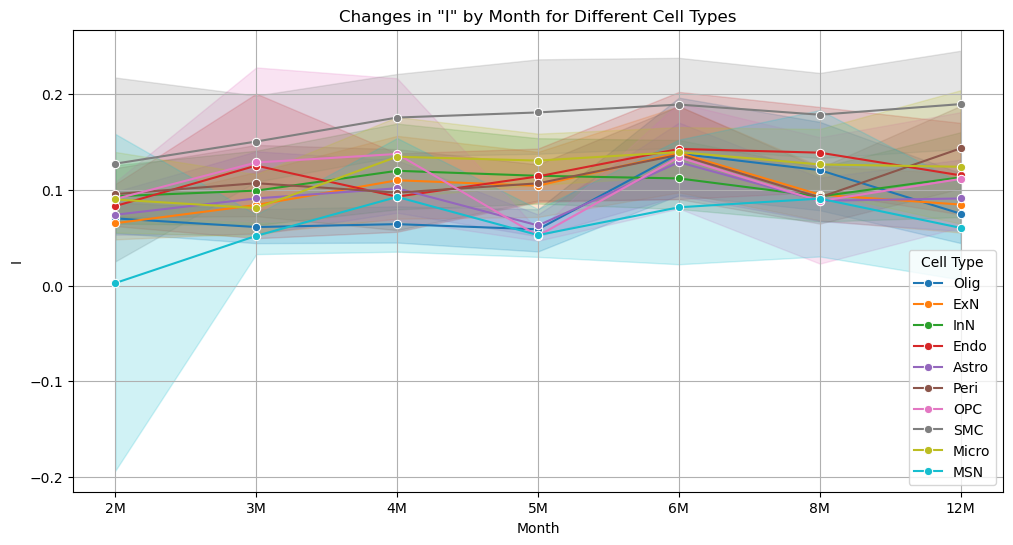

In [23]:
plt.figure(figsize=(12, 6))


sns.lineplot(data=fil_df, x='month', y='I', hue='celltype', errorbar="ci", marker='o')

# Customize the plot (optional)
plt.title('Changes in "I" by Month for Different Cell Types')
plt.xlabel('Month')
plt.ylabel('I')
plt.legend(title='Cell Type')
plt.grid(True)
plt.show()


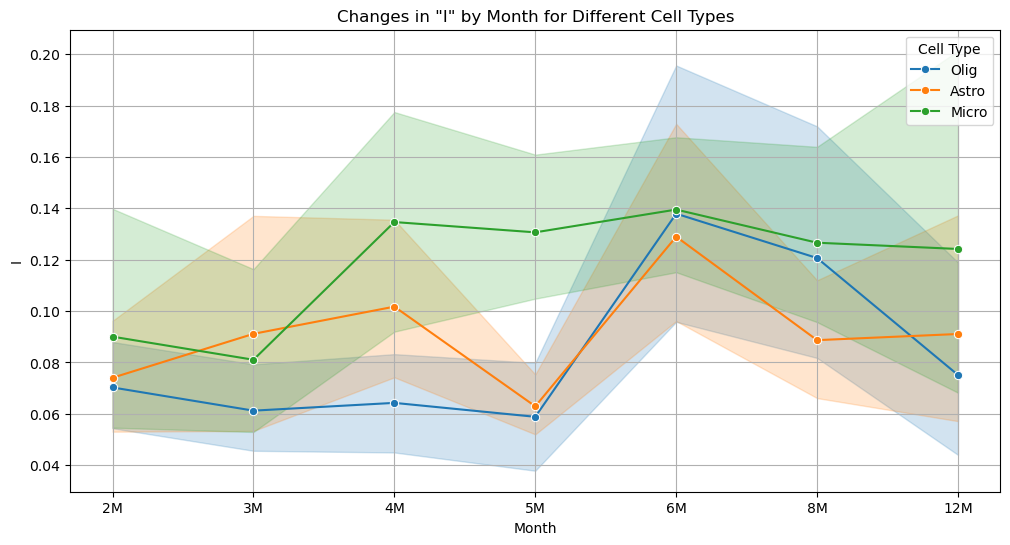

In [24]:
plt.figure(figsize=(12, 6))
mask = (fil_df["celltype"] == "Micro") | (fil_df["celltype"] == "Astro") | (fil_df["celltype"] == "Olig")

sns.lineplot(data=fil_df[mask], x='month', y='I', hue='celltype', errorbar="ci", marker='o')

# Customize the plot (optional)
plt.title('Changes in "I" by Month for Different Cell Types')
plt.xlabel('Month')
plt.ylabel('I')
plt.legend(title='Cell Type')
plt.grid(True)
plt.show()


In [26]:
fil_df["structure"].unique()

array(['Basal forebrain', 'Prefrontal cortex', 'Striatum',
       'Entorhinal area', 'Hippocampal formation', 'Retrosplenial area',
       'Thalamus'], dtype=object)

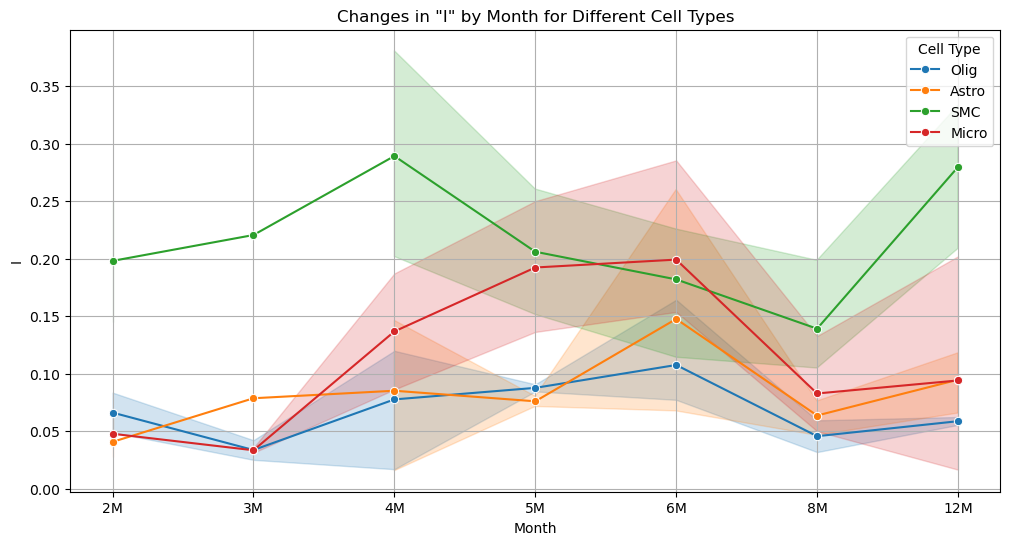

In [31]:
plt.figure(figsize=(12, 6))
mask = (fil_df["celltype"] == "Micro") | (fil_df["celltype"] == "Astro") | (fil_df["celltype"] == "Olig") | (fil_df["celltype"] == "SMC")
mask &= fil_df["structure"] == "Prefrontal cortex"

sns.lineplot(data=fil_df[mask], x='month', y='I', hue='celltype', errorbar="ci", marker='o')

# Customize the plot (optional)
plt.title('Changes in "I" by Month for Different Cell Types')
plt.xlabel('Month')
plt.ylabel('I')
plt.legend(title='Cell Type')
plt.grid(True)
plt.show()


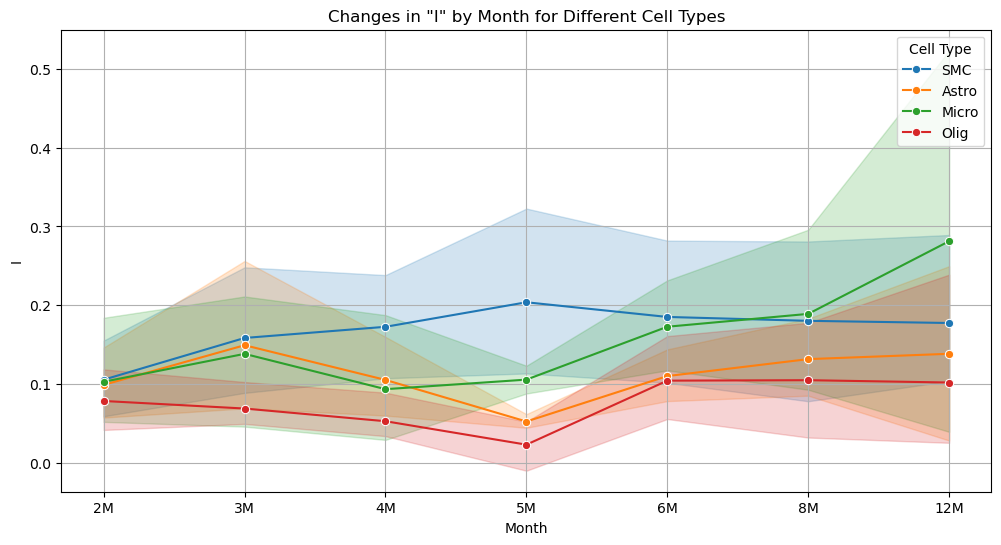

In [33]:
plt.figure(figsize=(12, 6))
mask = (fil_df["celltype"] == "Micro") | (fil_df["celltype"] == "Astro") | (fil_df["celltype"] == "Olig") | (fil_df["celltype"] == "SMC")
mask &= fil_df["structure"] == "Striatum"

sns.lineplot(data=fil_df[mask], x='month', y='I', hue='celltype', errorbar="ci", marker='o')

# Customize the plot (optional)
plt.title('Changes in "I" by Month for Different Cell Types')
plt.xlabel('Month')
plt.ylabel('I')
plt.legend(title='Cell Type')
plt.grid(True)
plt.show()


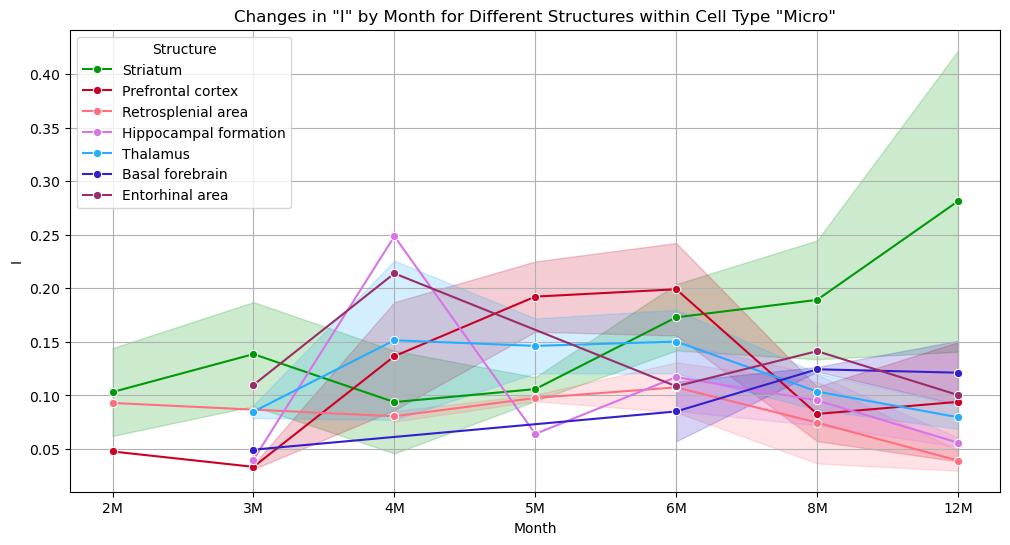

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Create a mask for the celltype "Micro"
mask = fil_df["celltype"] == "Micro"

# Apply the mask and use the hue parameter for the "structure" column
sns.lineplot(data=fil_df[mask], x='month', y='I', hue='structure', errorbar="se", marker='o', palette=region_pal)

# Customize the plot (optional)
plt.title('Changes in "I" by Month for Different Structures within Cell Type "Micro"')
plt.xlabel('Month')
plt.ylabel('I')
plt.legend(title='Structure')
plt.grid(True)
plt.show()


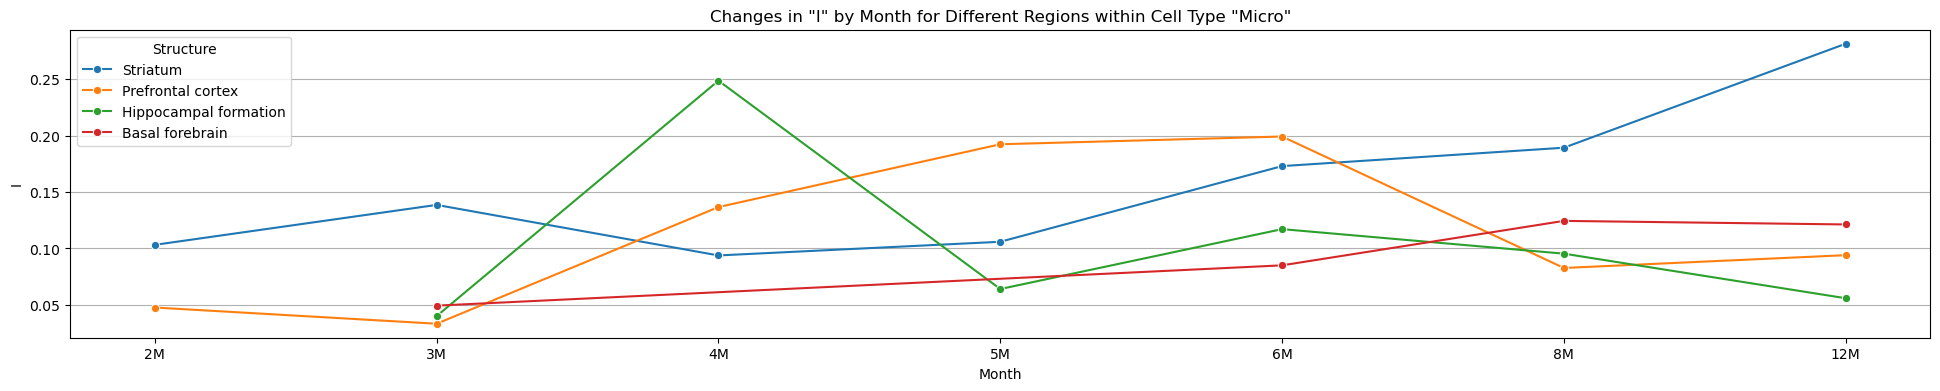

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(24, 4))

# Create a mask for the celltype "Micro"
mask = fil_df["celltype"] == "Micro"
mask &= (fil_df["structure"] == "Striatum") | (fil_df["structure"] == "Prefrontal cortex") | (fil_df["structure"] == "Hippocampal formation") | (fil_df["structure"] == "Basal forebrain")

# Apply the mask and use the hue parameter for the "structure" column
sns.lineplot(data=fil_df[mask], x='month', y='I', hue='structure', errorbar=None, marker='o')

# Customize the plot (optional)
plt.title('Changes in "I" by Month for Different Regions within Cell Type "Micro"')
plt.xlabel('Month')
plt.ylabel('I')
plt.legend(title='Structure')
plt.grid(True, axis = "y")
plt.show()


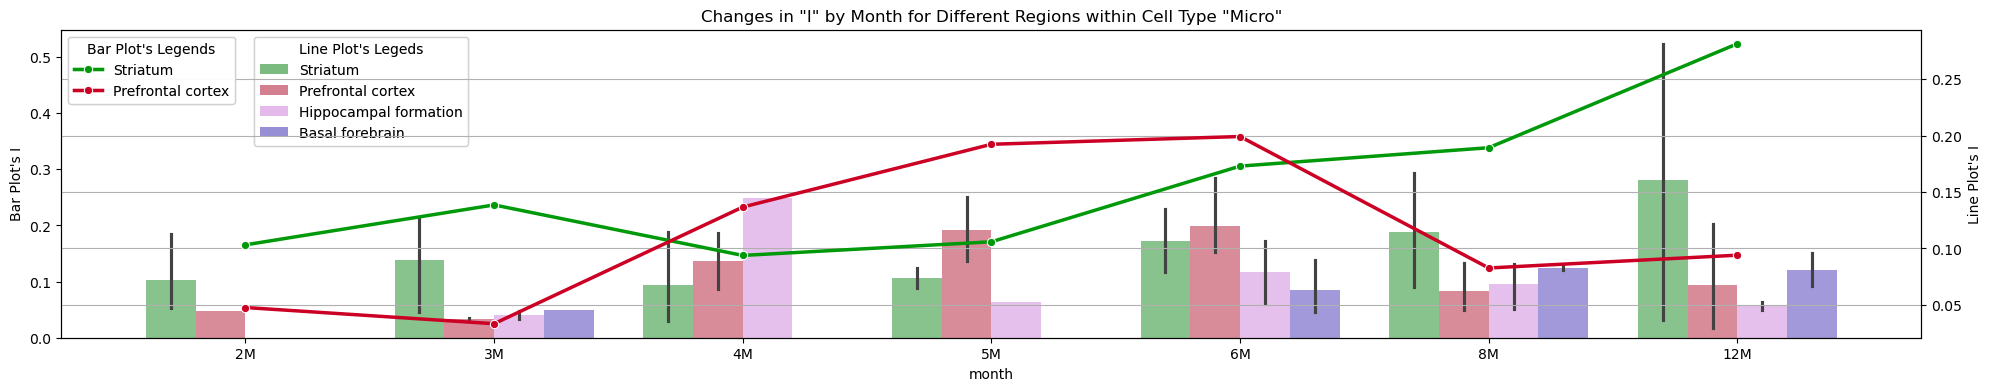

In [112]:
# Create the figure and the primary y-axis
fig, ax2 = plt.subplots(figsize=(24, 4))



# Create a secondary y-axis for the bar chart



mask = fil_df["celltype"] == "Micro"
mask &= (fil_df["structure"] == "Striatum") | (fil_df["structure"] == "Prefrontal cortex") | (fil_df["structure"] == "Hippocampal formation") | (fil_df["structure"] == "Basal forebrain")
# Plot the bar chart on the secondary y-axis
sns.barplot(ax=ax2, data=fil_df[mask], x='month', y='I', hue='structure', alpha=0.5, dodge=True, palette = region_pal)

# Customize the bar chart
ax2.set_ylabel("Bar Plot's I")
ax2.grid(False)  # Disable the grid on the secondary y-axis

# Create a mask for the celltype "Micro"
mask = fil_df["celltype"] == "Micro"
mask &= (fil_df["structure"] == "Striatum") | (fil_df["structure"] == "Prefrontal cortex")


ax1 = ax2.twinx()
# Plot the line plot on the primary y-axis
sns.lineplot(ax=ax1, data=fil_df[mask], x='month', y='I', hue='structure', errorbar=None, marker='o', linewidth=2.5, palette=region_pal)

# Customize the line plot
ax1.set_title('Changes in "I" by Month for Different Regions within Cell Type "Micro"')
ax1.set_xlabel('Month')
ax1.set_ylabel("Line Plot's I")
ax1.grid(True, axis="y")

# Gather the handles and labels for both plots
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Hide the original legends
ax1.legend().set_visible(False)
ax2.legend().set_visible(False)

# Create a combined custom legend
legend_line = ax1.legend(handles1, labels1, title="Bar Plot's Legends", loc='upper left', bbox_to_anchor=(0, 1), ncol=1)
legend_bar = ax2.legend(handles2, labels2, title="Line Plot's Legeds", loc='upper left', bbox_to_anchor=(0.1, 1), ncol=1)

# Add back the legends
ax1.add_artist(legend_line)
ax2.add_artist(legend_bar)


plt.savefig("../test_fig/moran_month.pdf", dpi = 350)

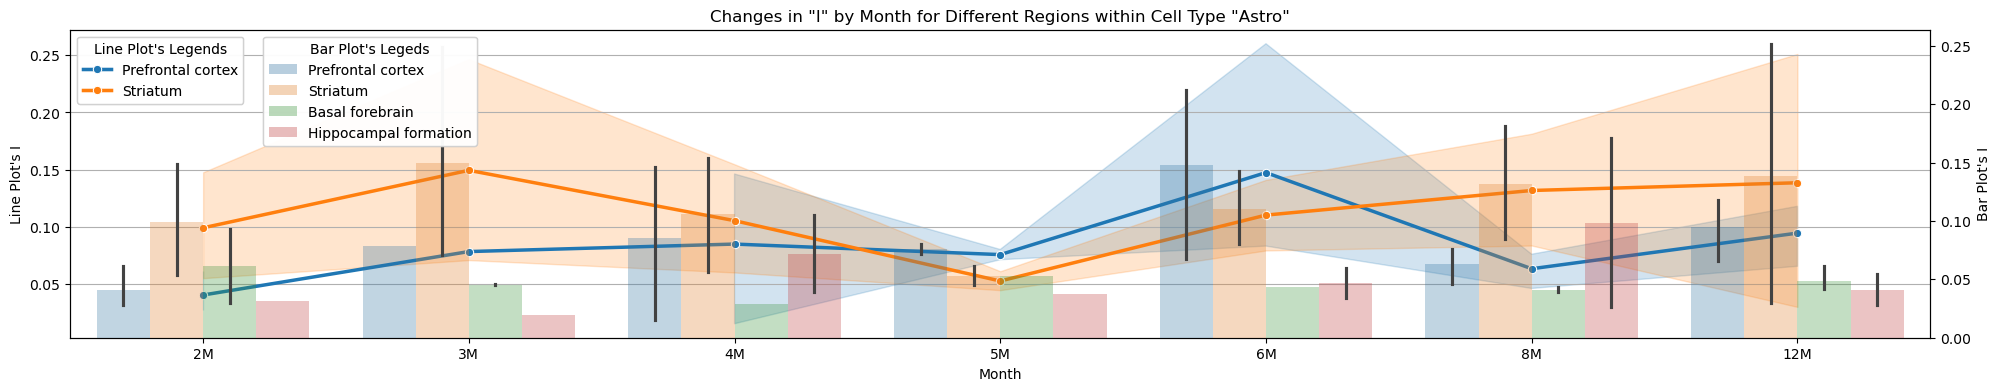

In [80]:
# Create the figure and the primary y-axis
fig, ax1 = plt.subplots(figsize=(24, 4))

# Create a mask for the celltype "Micro"
mask = fil_df["celltype"] == "Astro"
mask &= (fil_df["structure"] == "Striatum") | (fil_df["structure"] == "Prefrontal cortex")

# Plot the line plot on the primary y-axis
sns.lineplot(ax=ax1, data=fil_df[mask], x='month', y='I', hue='structure', errorbar="ci", marker='o', linewidth=2.5)

# Customize the line plot
ax1.set_title('Changes in "I" by Month for Different Regions within Cell Type "Astro"')
ax1.set_xlabel('Month')
ax1.set_ylabel("Line Plot's I")
ax1.grid(True, axis="y")

# Create a secondary y-axis for the bar chart
ax2 = ax1.twinx()


mask = fil_df["celltype"] == "Astro"
mask &= (fil_df["structure"] == "Striatum") | (fil_df["structure"] == "Prefrontal cortex") | (fil_df["structure"] == "Hippocampal formation") | (fil_df["structure"] == "Basal forebrain")
# Plot the bar chart on the secondary y-axis
sns.barplot(ax=ax2, data=fil_df[mask], x='month', y='I', hue='structure', alpha=0.3, dodge=True)

# Customize the bar chart
ax2.set_ylabel("Bar Plot's I")
ax2.grid(False)  # Disable the grid on the secondary y-axis

# Gather the handles and labels for both plots
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Hide the original legends
ax1.legend().set_visible(False)
ax2.legend().set_visible(False)

# Create a combined custom legend
legend_line = ax1.legend(handles1, labels1, title="Line Plot's Legends", loc='upper left', bbox_to_anchor=(0, 1), ncol=1)
legend_bar = ax2.legend(handles2, labels2, title="Bar Plot's Legeds", loc='upper left', bbox_to_anchor=(0.1, 1), ncol=1)

# Add back the legends
ax1.add_artist(legend_line)
ax2.add_artist(legend_bar)

plt.show()

# Neuron

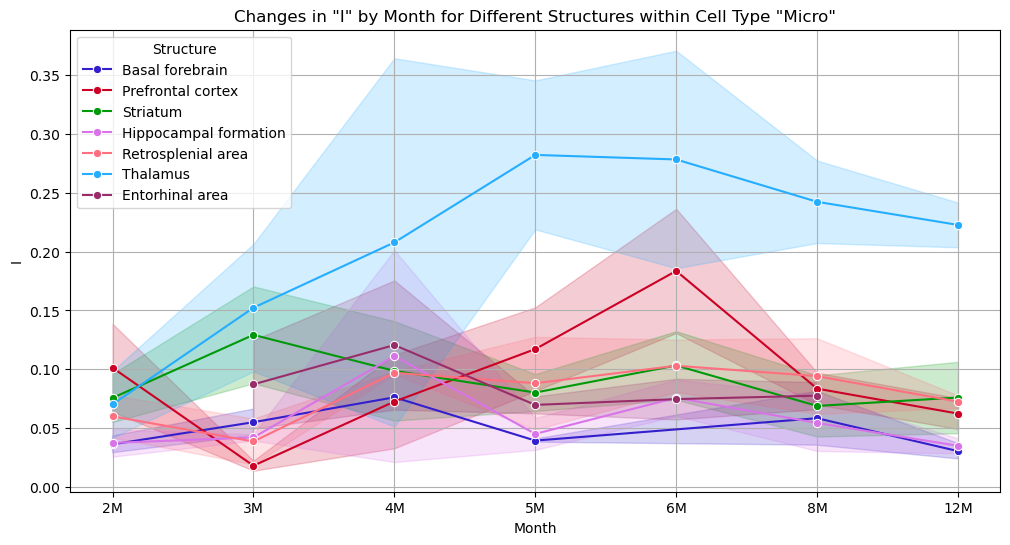

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Create a mask for the celltype "Micro"
mask = fil_df["celltype"] == "ExN"

# Apply the mask and use the hue parameter for the "structure" column
sns.lineplot(data=fil_df[mask], x='month', y='I', hue='structure', errorbar="se", marker='o', palette=region_pal)

# Customize the plot (optional)
plt.title('Changes in "I" by Month for Different Structures within Cell Type "Micro"')
plt.xlabel('Month')
plt.ylabel('I')
plt.legend(title='Structure')
plt.grid(True)
plt.show()


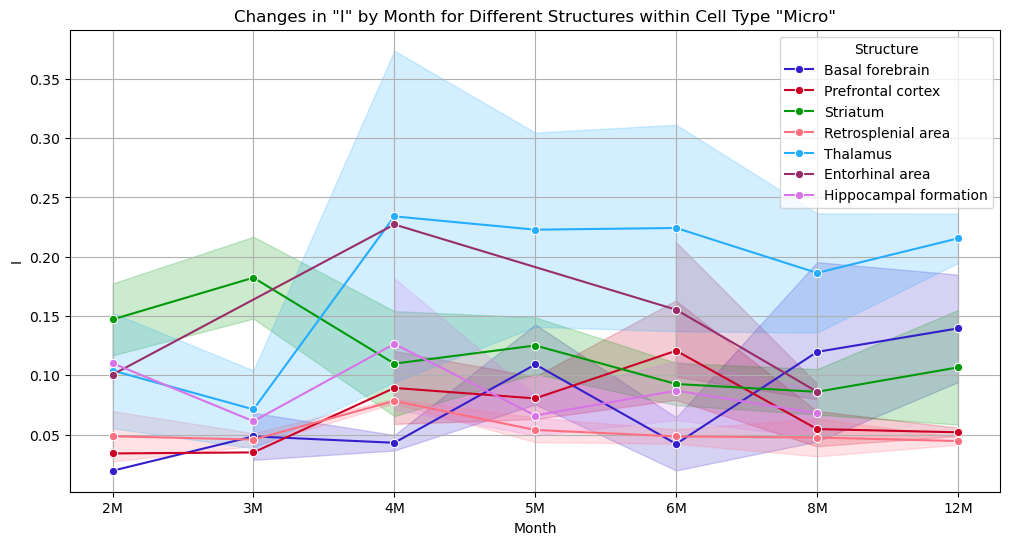

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Create a mask for the celltype "Micro"
mask = fil_df["celltype"] == "InN"

# Apply the mask and use the hue parameter for the "structure" column
sns.lineplot(data=fil_df[mask], x='month', y='I', hue='structure', errorbar="se", marker='o', palette=region_pal)

# Customize the plot (optional)
plt.title('Changes in "I" by Month for Different Structures within Cell Type "Micro"')
plt.xlabel('Month')
plt.ylabel('I')
plt.legend(title='Structure')
plt.grid(True)
plt.show()


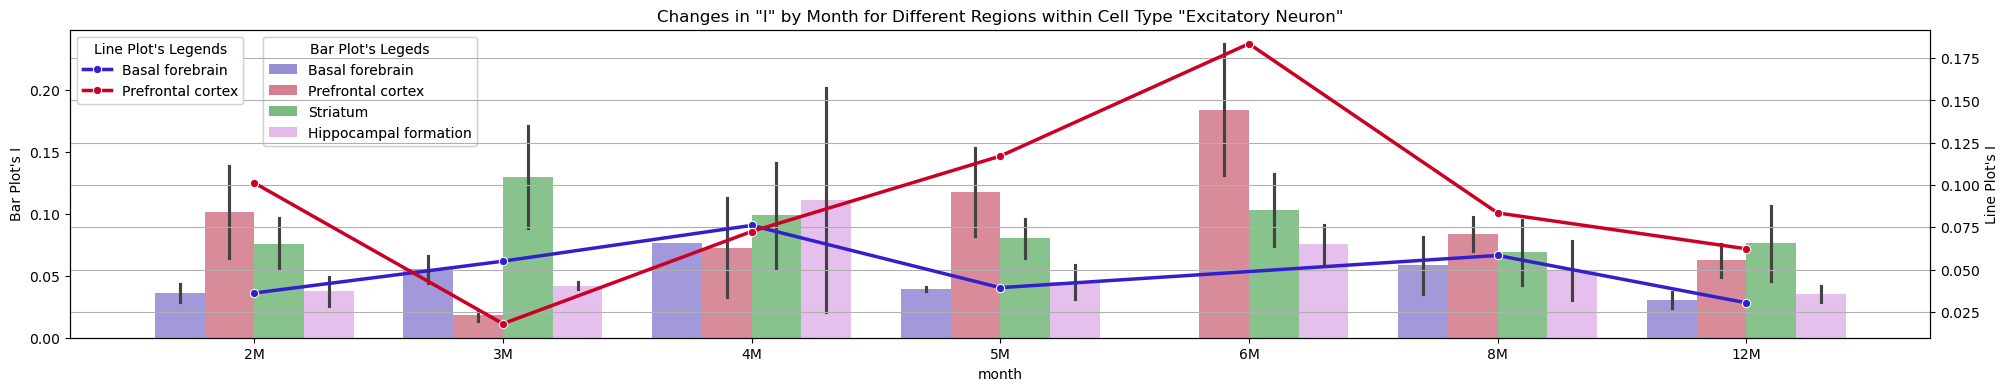

In [125]:
# Create the figure and the primary y-axis
fig, ax2 = plt.subplots(figsize=(24, 4))



# Create a secondary y-axis for the bar chart



mask = fil_df["celltype"] == "ExN"
mask &= (fil_df["structure"] == "Striatum") | (fil_df["structure"] == "Prefrontal cortex") | (fil_df["structure"] == "Hippocampal formation") | (fil_df["structure"] == "Basal forebrain")
# Plot the bar chart on the secondary y-axis
sns.barplot(ax=ax2, data=fil_df[mask], x='month', y='I', hue='structure', alpha=0.5, dodge=True, palette = region_pal, errorbar="se")

# Customize the bar chart
ax2.set_ylabel("Bar Plot's I")
ax2.grid(False)  # Disable the grid on the secondary y-axis

# Create a mask for the celltype "Micro"
mask = fil_df["celltype"] == "ExN"
mask &= (fil_df["structure"] == "Basal forebrain") | (fil_df["structure"] == "Prefrontal cortex")


ax1 = ax2.twinx()
# Plot the line plot on the primary y-axis
sns.lineplot(ax=ax1, data=fil_df[mask], x='month', y='I', hue='structure', errorbar=None, marker='o', linewidth=2.5, palette=region_pal)

# Customize the line plot
ax1.set_title('Changes in "I" by Month for Different Regions within Cell Type "Excitatory Neuron"')
ax1.set_xlabel('Month')
ax1.set_ylabel("Line Plot's I")
ax1.grid(True, axis="y")

# Gather the handles and labels for both plots
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Hide the original legends
ax1.legend().set_visible(False)
ax2.legend().set_visible(False)

# Create a combined custom legend
legend_line = ax1.legend(handles1, labels1, title="Line Plot's Legends", loc='upper left', bbox_to_anchor=(0, 1), ncol=1)
legend_bar = ax2.legend(handles2, labels2, title="Bar Plot's Legeds", loc='upper left', bbox_to_anchor=(0.1, 1), ncol=1)

# Add back the legends
ax1.add_artist(legend_line)
ax2.add_artist(legend_bar)


plt.savefig("../test_fig/moran_month.pdf", dpi = 350)

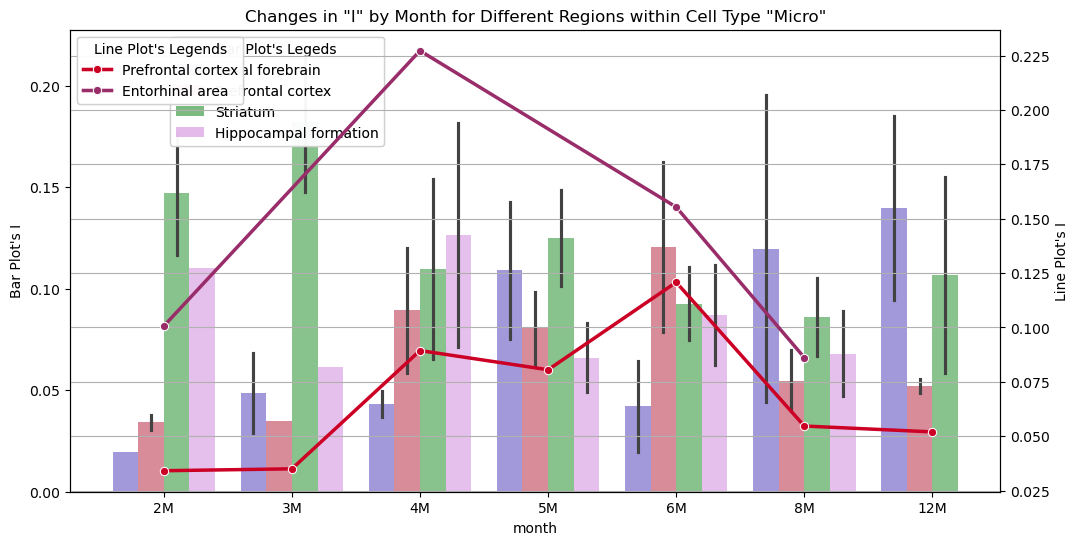

In [123]:
# Create the figure and the primary y-axis
fig, ax2 = plt.subplots(figsize=(12, 6))



# Create a secondary y-axis for the bar chart



mask = fil_df["celltype"] == "InN"
mask &= (fil_df["structure"] == "Striatum") | (fil_df["structure"] == "Prefrontal cortex") | (fil_df["structure"] == "Hippocampal formation") | (fil_df["structure"] == "Basal forebrain")
# Plot the bar chart on the secondary y-axis
sns.barplot(ax=ax2, data=fil_df[mask], x='month', y='I', hue='structure', alpha=0.5, dodge=True, palette = region_pal, errorbar="se")

# Customize the bar chart
ax2.set_ylabel("Bar Plot's I")
ax2.grid(False)  # Disable the grid on the secondary y-axis

# Create a mask for the celltype "Micro"
mask = fil_df["celltype"] == "InN"
mask &= (fil_df["structure"] == "Entorhinal area") | (fil_df["structure"] == "Prefrontal cortex")


ax1 = ax2.twinx()
# Plot the line plot on the primary y-axis
sns.lineplot(ax=ax1, data=fil_df[mask], x='month', y='I', hue='structure', errorbar=None, marker='o', linewidth=2.5, palette=region_pal)

# Customize the line plot
ax1.set_title('Changes in "I" by Month for Different Regions within Cell Type "Micro"')
ax1.set_xlabel('Month')
ax1.set_ylabel("Line Plot's I")
ax1.grid(True, axis="y")

# Gather the handles and labels for both plots
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Hide the original legends
ax1.legend().set_visible(False)
ax2.legend().set_visible(False)

# Create a combined custom legend
legend_line = ax1.legend(handles1, labels1, title="Line Plot's Legends", loc='upper left', bbox_to_anchor=(0, 1), ncol=1)
legend_bar = ax2.legend(handles2, labels2, title="Bar Plot's Legeds", loc='upper left', bbox_to_anchor=(0.1, 1), ncol=1)

# Add back the legends
ax1.add_artist(legend_line)
ax2.add_artist(legend_bar)


plt.savefig("../test_fig/moran_month.pdf", dpi = 350)

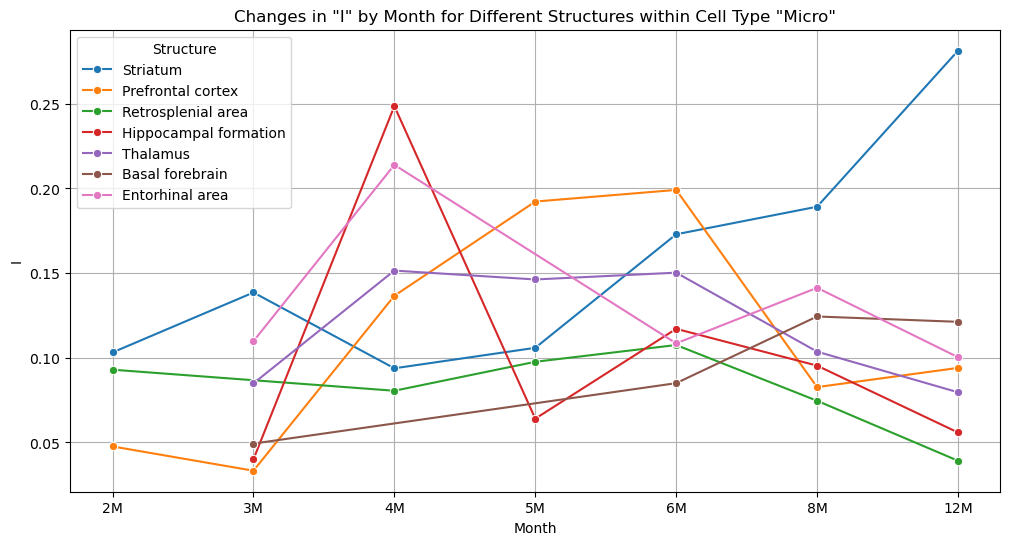

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Create a mask for the celltype "Micro"
mask = fil_df["celltype"] == "Micro"

# Apply the mask and use the hue parameter for the "structure" column
sns.lineplot(data=fil_df[mask], x='month', y='I', hue='structure', errorbar=None, marker='o')

# Customize the plot (optional)
plt.title('Changes in "I" by Month for Different Structures within Cell Type "Micro"')
plt.xlabel('Month')
plt.ylabel('I')
plt.legend(title='Structure')
plt.grid(True)
plt.show()


In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import UnivariateSpline
from statsmodels.nonparametric.smoothers_lowess import lowess

# Your DataFrame code remains the same
grouped_df = fil_df.groupby(['celltype', 'month_numeric'])['I'].mean().reset_index()

# Plotting setup
plt.figure(figsize=(10, 4))

# Iterate through each celltype
for celltype in grouped_df['celltype'].unique():
    subset = grouped_df[grouped_df['celltype'] == celltype]
    
    # Polynomial fitting
    poly_coeffs = np.polyfit(subset['month_numeric'], subset['I'], deg=3)  # degree 3 polynomial
    poly_fit = np.poly1d(poly_coeffs)
    poly_x = np.linspace(subset['month_numeric'].min(), subset['month_numeric'].max(), 100)
    poly_y = poly_fit(poly_x)
    
    # Spline interpolation
    spline_fit = UnivariateSpline(subset['month_numeric'], subset['I'])
    spline_x = np.linspace(subset['month_numeric'].min(), subset['month_numeric'].max(), 100)
    spline_y = spline_fit(spline_x)
    
    # Lowess smoothing
    lowess_fit = lowess(subset['I'], subset['month_numeric'], frac=0.3)
    lowess_x = lowess_fit[:, 0]
    lowess_y = lowess_fit[:, 1]
    
    # Plot original data points with label=None to exclude them from the legend
    sns.scatterplot(data=subset, x='month_numeric', y='I', label=None, s=100)
    
    # Plot polynomial fit
    plt.plot(poly_x, poly_y, label=f'{celltype} poly fit')
    
plt.title('Change in Value I Over Time for Each Cell Type with Smooth Curves')
plt.xlabel('month_numeric')
plt.ylabel('Value I')
# Here we explicitly set the legend again to ensure only the fitted lines are included
plt.legend(title='Cell Type and Fit')
plt.grid(True)
plt.show()

KeyError: 'month_numeric'

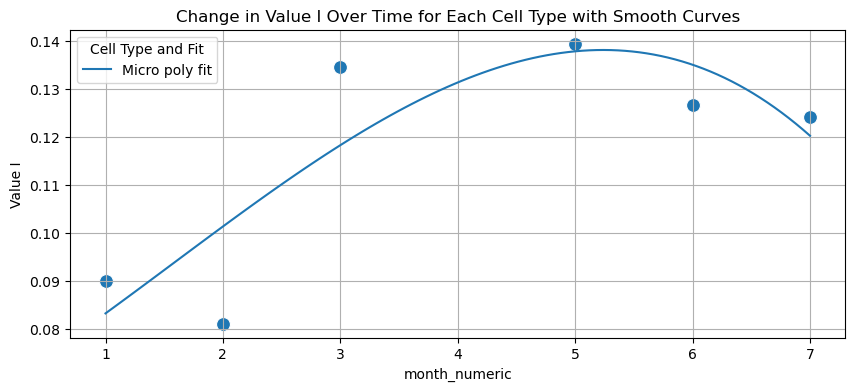

In [265]:
# Your DataFrame code remains the same
grouped_df = fil_df.groupby(['celltype', 'month_numeric'])['I'].mean().reset_index()
mask = grouped_df["celltype"] == "Micro"
grouped_df = grouped_df[mask]

# Plotting setup
plt.figure(figsize=(10, 4))

# Iterate through each celltype
for celltype in grouped_df['celltype'].unique():
    subset = grouped_df[grouped_df['celltype'] == celltype]
    
    # Polynomial fitting
    poly_coeffs = np.polyfit(subset['month_numeric'], subset['I'], deg=3)  # degree 3 polynomial
    poly_fit = np.poly1d(poly_coeffs)
    poly_x = np.linspace(subset['month_numeric'].min(), subset['month_numeric'].max(), 100)
    poly_y = poly_fit(poly_x)
    
    # Spline interpolation
    spline_fit = UnivariateSpline(subset['month_numeric'], subset['I'])
    spline_x = np.linspace(subset['month_numeric'].min(), subset['month_numeric'].max(), 100)
    spline_y = spline_fit(spline_x)
    
    # Lowess smoothing
    lowess_fit = lowess(subset['I'], subset['month_numeric'], frac=0.3)
    lowess_x = lowess_fit[:, 0]
    lowess_y = lowess_fit[:, 1]
    
    # Plot original data points with label=None to exclude them from the legend
    sns.scatterplot(data=subset, x='month_numeric', y='I', label=None, s=100)
    
    # Plot polynomial fit
    plt.plot(poly_x, poly_y, label=f'{celltype} poly fit')
    
plt.title('Change in Value I Over Time for Each Cell Type with Smooth Curves')
plt.xlabel('month_numeric')
plt.ylabel('Value I')
# Here we explicitly set the legend again to ensure only the fitted lines are included
plt.legend(title='Cell Type and Fit')
plt.grid(True)
plt.show()